# 141044024 Emre ÇELİK HW1

## Common Functions

In [43]:
## import libraries 

import math
import random 
import operator
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import scikitplot as skplt
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [44]:
## Euclidian Distance Method

def euclidDistance(a, b, size):
    distance = 0
    for i in range(size):
        distance += pow(a[i] - b[i], 2)

    return math.sqrt(distance)

In [45]:
## Manhattan Distance Method

def manhattanDistance(a, b, size):
    distance = 0
    for i in range(size):
        distance += math.fabs(a[i] - b[i])

    return distance

In [46]:
## K Closest Neighbots

"""
x_train : all training input data
y_train : all training output data
x_test : single test data
dist_method : euclidDistance or manhattanDistance

return : k# neighbors as : (x_train, y_train, distance)

"""
def getNeighbors(x_train, y_train, x_test, k, dist_method):
    all_dist = []
    test_len = len(x_test)
    for i in range(len(x_train)):
        dist = dist_method(x_test, x_train[i], test_len)
        all_dist.append((x_train[i], y_train[i], dist))

    all_dist.sort(key=operator.itemgetter(2))
    return all_dist[:k]

In [47]:
## Max Counted Class
# Needed for classifying

def maxCountedClass(neighbors, class_index):
    votes = {}
    for i in range(len(neighbors)):
        result = neighbors[i][class_index]
        if result in votes:
            votes[result] += 1
        else:
            votes[result] = 1

    sortedVotes = sorted(votes.items(), key=operator.itemgetter(1), reverse=True)
    
    return sortedVotes[0][0];

In [48]:
## KNN Classifier

"""
x_train : all training input data
y_train : all training output data
x_test : single test data
dist_method : euclidDistance or manhattanDistance

return : knn as target dataset

"""

def KNNClassify(x_train, y_train, x_test, k=5, method='euclidean'):
    dist_method = euclidDistance
    knn = []
    
    if method is 'manhattan':
        dist_method = manhattanDistance    

    for i in range(len(x_test)):
        neighbors = getNeighbors(x_train, y_train, x_test[i], k, dist_method)
        knn.append(maxCountedClass(neighbors, 1))
        
    return np.array(knn)

# test

def KNNTest():
    x_train = [[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    y_train = [1,1,3,4]
    x_test = [[1,2,3],[2,3,4]]
    y_test = [1,1]
    y_pred = KNNClassify(x_train, y_train, x_test, k=5, method='manhattan')
    print("x_train:",x_train,"\ny_train:",y_train,"\nx_test:",x_test,"\ny_test:",y_test,"\ny_pred:",y_pred,"\nAccuracy : ",accuracy_score(y_test, y_pred))
    
#KNNTest()

In [49]:
## read the data

def readLeafData(csvFileName):
    leafdataset = pd.read_csv(csvFileName, header=None)
    leafdataset.head()
    
    return np.array(leafdataset)

def TestReadData():
    ## test
    leafdataset = readLeafData("leaf.csv")
    print ("\nDataset Length : ",leafdataset.shape)  
    
# TestReadData()

In [50]:
# pre-processing on data - feature scaling (normalization method)

def PreProcess(x_train, x_test):
    scx = StandardScaler()
    x_train = scx.fit_transform(x_train.astype(float))
    x_test = scx.transform(x_test.astype(float))
    
    return x_train, x_test

In [51]:
# report perfomance

def ReportPerformance(y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(report)


In [52]:
# confusion matrix

def ViewConfusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    plt.rcParams["figure.figsize"] = [12,9]
    skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    plt.show()


In [53]:
# Print Accuracy 

def ViewAccuracy(y_test, y_pred):
    print("Accuracy : %",accuracy_score(y_test, y_pred) * 100)

In [54]:
# View Roc Curve
# Reference : https://medium.com/datadriveninvestor/computing-an-roc-graph-with-python-a3aa20b9a3fb

def ViewRocCurve(y_test, y_pred):
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC')
    plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()
    
    print("Thresholds : \n",thresholds,"\n")

## PART 1

              precision    recall  f1-score   support

         1.0       0.44      0.58      0.50        12
         2.0       0.40      0.60      0.48        10
         3.0       0.46      0.60      0.52        10
         4.0       0.33      0.12      0.18         8
         5.0       0.75      1.00      0.86        12
         6.0       0.88      0.88      0.88         8
         7.0       0.60      0.30      0.40        10
         8.0       1.00      1.00      1.00        11
         9.0       0.53      0.64      0.58        14
        10.0       0.83      0.38      0.53        13
        11.0       0.94      1.00      0.97        16
        12.0       0.62      0.67      0.64        12
        13.0       0.50      0.54      0.52        13
        14.0       0.53      0.67      0.59        12
        15.0       0.90      0.90      0.90        10
        22.0       0.67      0.67      0.67        12
        23.0       0.89      0.73      0.80        11
        24.0       0.58    

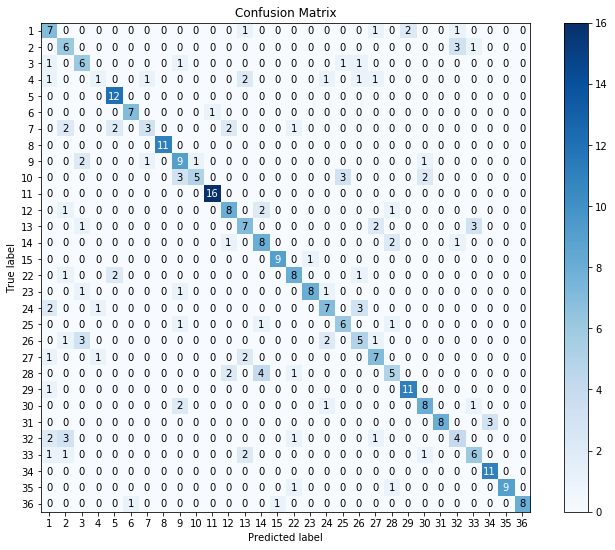

Accuracy : % 66.47058823529412


In [55]:
# KNN Classifier , k = 5, method = euclidian

def part1():

    ## extract the input(X) and output(y) from the data

    dataset = readLeafData("leaf.csv")
    # k = 5, shuffle 
    kf = KFold(5, shuffle=True)
    # target test data
    total_y_test = []
    # predictions
    total_y_pred = []
    
    for tr, te in kf.split(dataset):
        train = dataset[tr]
        test = dataset[te]
        
        x_train = train[:, 2:]
        y_train = train[:, 0]
        
        x_test = test[:, 2:]
        y_test = test[:, 0]
        
        # pre-processing data
        x_train, x_test = PreProcess(x_train, x_test)
        
        # predicate
        y_pred = KNNClassify(x_train, y_train, x_test, k=5, method='euclidean')        
        
        total_y_test += y_test.tolist()
        total_y_pred += y_pred.tolist()
    
    total_y_test = np.array(total_y_test)
    total_y_pred = np.array(total_y_pred)
    
    # report performance, view confusion matrix and accuracy
    ReportPerformance(total_y_test, total_y_pred)
    ViewConfusionMatrix(total_y_test.astype(int), total_y_pred.astype(int))
    ViewAccuracy(total_y_test, total_y_pred)
    
part1()

## PART 2

              precision    recall  f1-score   support

         1.0       0.50      0.75      0.60        12
         2.0       0.70      0.70      0.70        10
         3.0       0.75      0.60      0.67        10
         4.0       0.40      0.25      0.31         8
         5.0       0.73      0.92      0.81        12
         6.0       0.75      0.75      0.75         8
         7.0       0.57      0.40      0.47        10
         8.0       1.00      1.00      1.00        11
         9.0       0.53      0.71      0.61        14
        10.0       0.86      0.46      0.60        13
        11.0       0.94      0.94      0.94        16
        12.0       0.53      0.67      0.59        12
        13.0       0.38      0.46      0.41        13
        14.0       0.37      0.58      0.45        12
        15.0       0.90      0.90      0.90        10
        22.0       0.67      0.33      0.44        12
        23.0       0.77      0.91      0.83        11
        24.0       0.44    

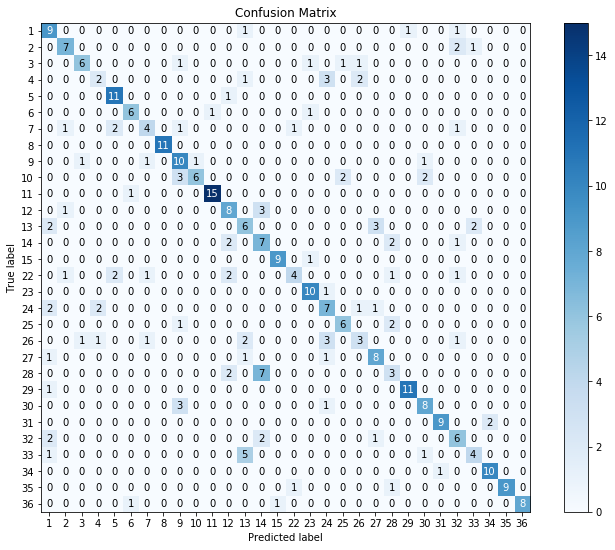

Accuracy : % 65.58823529411765


In [56]:
# KNN Classifier , k = 5, method = manhattan


def part2():

## extract the input(X) and output(y) from the data

    dataset = readLeafData("leaf.csv")
    # k = 5, shuffle 
    kf = KFold(5, True)
    total_y_test = []
    total_y_pred = []
    
    for tr, te in kf.split(dataset):
        train = dataset[tr]
        test = dataset[te]
        
        x_train = train[:, 2:]
        y_train = train[:, 0]
        
        x_test = test[:, 2:]
        y_test = test[:, 0]
        
        # pre-processing data
        x_train, x_test = PreProcess(x_train, x_test)
        
        # predicate
        y_pred = KNNClassify(x_train, y_train, x_test, k=5, method='manhattan')        
        
        total_y_test += y_test.tolist()
        total_y_pred += y_pred.tolist()
    
    total_y_test = np.array(total_y_test)
    total_y_pred = np.array(total_y_pred)
    
    # report performance, view confusion matrix and accuracy
    
    ReportPerformance(total_y_test, total_y_pred)
    ViewConfusionMatrix(total_y_test.astype(int), total_y_pred.astype(int))
    ViewAccuracy(total_y_test, total_y_pred)
    
part2()

## PART 3

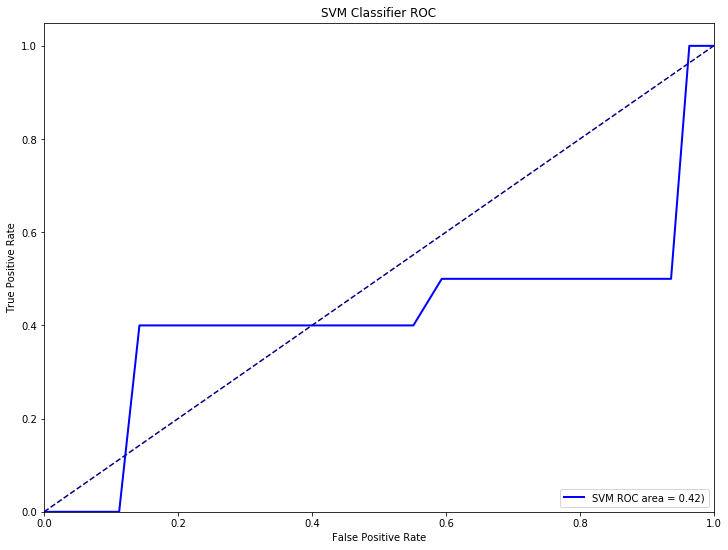

Thresholds : 
 [37. 36. 35. 34. 33. 32. 31. 30. 29. 26. 25. 24. 23. 22. 15. 14. 13. 12.
 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.] 

              precision    recall  f1-score   support

         1.0       0.67      0.67      0.67        12
         2.0       0.36      0.50      0.42        10
         3.0       0.60      0.60      0.60        10
         4.0       0.71      0.62      0.67         8
         5.0       1.00      0.92      0.96        12
         6.0       0.88      0.88      0.88         8
         7.0       0.78      0.70      0.74        10
         8.0       1.00      1.00      1.00        11
         9.0       0.62      0.71      0.67        14
        10.0       0.91      0.77      0.83        13
        11.0       1.00      1.00      1.00        16
        12.0       0.71      0.83      0.77        12
        13.0       0.67      0.77      0.71        13
        14.0       0.36      0.42      0.38        12
        15.0       1.00      1.00      1.00        10

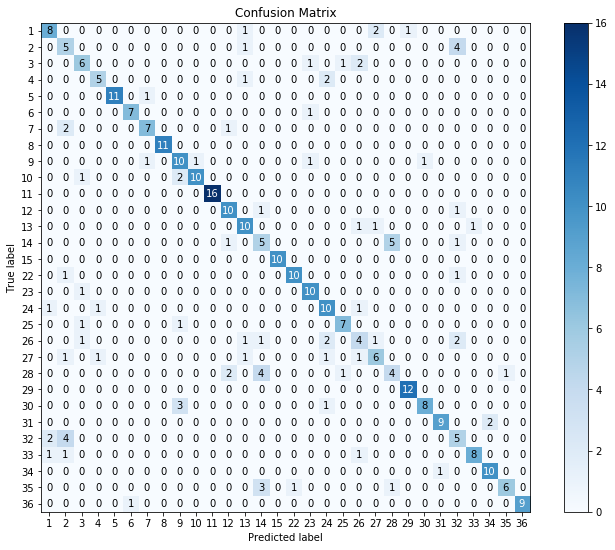

Accuracy : % 73.23529411764706


In [57]:
# Linear SVM Classifier 

def part3():

## extract the input(X) and output(y) from the data

    dataset = readLeafData("leaf.csv")
    # k = 5, shuffle 
    kf = KFold(5, True)
    total_y_test = []
    total_y_pred = []
    
    for tr, te in kf.split(dataset):
        train = dataset[tr]
        test = dataset[te]
        
        x_train = train[:, 2:]
        y_train = train[:, 0]
        
        x_test = test[:, 2:]
        y_test = test[:, 0]
        
        
        x_train, x_test = PreProcess(x_train, x_test)
        
        # predicate
        svclassifier = SVC(kernel='linear',gamma='scale')  
        svclassifier.fit(x_train, y_train) 
        y_pred = svclassifier.predict(x_test)  
        
        total_y_test += y_test.tolist()
        total_y_pred += y_pred.tolist()
    
    total_y_test = np.array(total_y_test)
    total_y_pred = np.array(total_y_pred)
    
    # report performance, view confusion matrix and accuracy, view roc curve
    
    ViewRocCurve(total_y_test, total_y_pred)
    ReportPerformance(total_y_test, total_y_pred)
    ViewConfusionMatrix(total_y_test.astype(int), total_y_pred.astype(int))
    ViewAccuracy(total_y_test, total_y_pred)

    
part3()

## PART 4

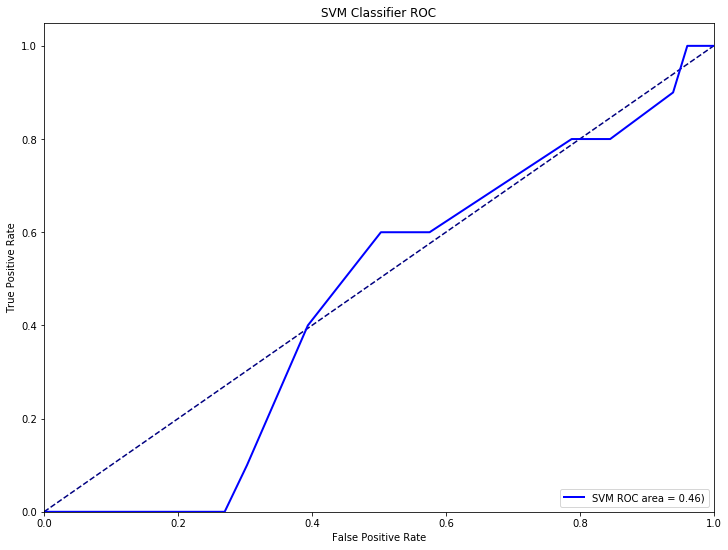

Thresholds : 
 [37. 36. 35. 34. 33. 31. 30. 29. 28. 27. 26. 25. 24. 23. 15. 14. 13. 12.
 11. 10.  9.  8.  6.  5.  3.  2.  1.] 

              precision    recall  f1-score   support

         1.0       0.42      0.42      0.42        12
         2.0       0.00      0.00      0.00        10
         3.0       0.00      0.00      0.00        10
         4.0       0.00      0.00      0.00         8
         5.0       0.03      0.08      0.05        12
         6.0       0.88      0.88      0.88         8
         7.0       0.00      0.00      0.00        10
         8.0       1.00      1.00      1.00        11
         9.0       0.10      0.50      0.16        14
        10.0       0.88      0.54      0.67        13
        11.0       1.00      1.00      1.00        16
        12.0       0.03      0.08      0.04        12
        13.0       0.00      0.00      0.00        13
        14.0       0.08      0.08      0.08        12
        15.0       1.00      0.70      0.82        10
       

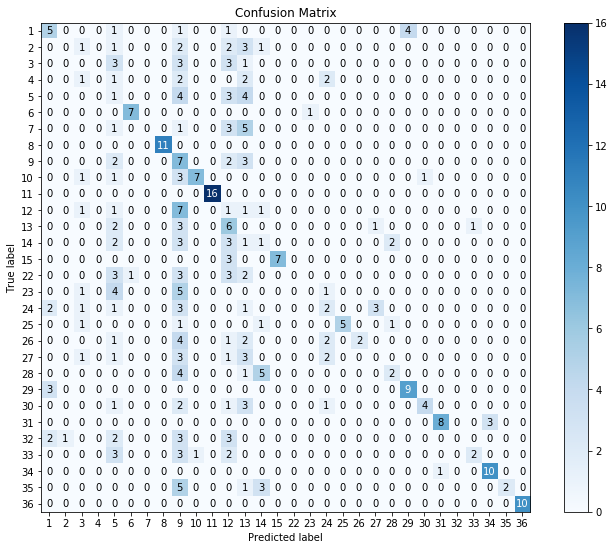

Accuracy : % 35.0


In [58]:
# Polynomial SVM Classifier 

def part4():

    ## extract the input(X) and output(y) from the data

    dataset = readLeafData("leaf.csv")
    # k = 5, shuffle 
    kf = KFold(5, True)
    total_y_test = []
    total_y_pred = []
    
    for tr, te in kf.split(dataset):
        train = dataset[tr]
        test = dataset[te]
        
        x_train = train[:, 2:]
        y_train = train[:, 0]
        
        x_test = test[:, 2:]
        y_test = test[:, 0]
        
        
        x_train, x_test = PreProcess(x_train, x_test)
        
        # predicate
        svclassifier = SVC(kernel='poly',gamma='scale')  
        svclassifier.fit(x_train, y_train) 
        y_pred = svclassifier.predict(x_test)  
        
        total_y_test += y_test.tolist()
        total_y_pred += y_pred.tolist()
    
    total_y_test = np.array(total_y_test)
    total_y_pred = np.array(total_y_pred)
    
    # report performance, view confusion matrix and accuracy, view roc curve
    
    ViewRocCurve(total_y_test, total_y_pred)
    ReportPerformance(total_y_test, total_y_pred)
    ViewConfusionMatrix(total_y_test.astype(int), total_y_pred.astype(int))
    ViewAccuracy(total_y_test, total_y_pred)

    
part4()

## PART 5

              precision    recall  f1-score   support

         1.0       0.50      0.58      0.54        12
         2.0       0.17      0.20      0.18        10
         3.0       0.33      0.20      0.25        10
         4.0       0.14      0.25      0.18         8
         5.0       0.85      0.92      0.88        12
         6.0       0.83      0.62      0.71         8
         7.0       0.40      0.40      0.40        10
         8.0       1.00      1.00      1.00        11
         9.0       0.27      0.50      0.35        14
        10.0       0.82      0.69      0.75        13
        11.0       0.94      1.00      0.97        16
        12.0       0.83      0.83      0.83        12
        13.0       0.40      0.46      0.43        13
        14.0       0.88      0.58      0.70        12
        15.0       0.69      0.90      0.78        10
        22.0       0.57      0.67      0.62        12
        23.0       0.60      0.55      0.57        11
        24.0       0.38    

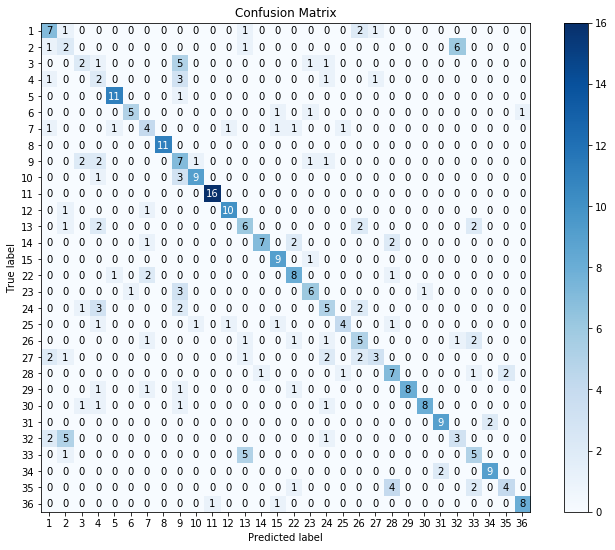

Accuracy : % 58.82352941176471


In [59]:
# Decision Trees

def part5():

## extract the input(X) and output(y) from the data

    dataset = readLeafData("leaf.csv")
    # k = 5, shuffle 
    kf = KFold(10, True)
    total_y_test = []
    total_y_pred = []
    
    for tr, te in kf.split(dataset):
        train = dataset[tr]
        test = dataset[te]
        
        x_train = train[:, 2:]
        y_train = train[:, 0]
        
        x_test = test[:, 2:]
        y_test = test[:, 0]
        
        
        x_train, x_test = PreProcess(x_train, x_test)
        
        # predicate
        # different pruning parameters
        clf = tree.DecisionTreeClassifier(max_leaf_nodes=50, min_samples_leaf=1, max_depth=30)
        clf.fit(x_train, y_train) 
        y_pred = clf.predict(x_test)  
        
        total_y_test += y_test.tolist()
        total_y_pred += y_pred.tolist()
    
    total_y_test = np.array(total_y_test)
    total_y_pred = np.array(total_y_pred)
    
    # report performance, view confusion matrix and accuracy
    
    ReportPerformance(total_y_test, total_y_pred)
    ViewConfusionMatrix(total_y_test.astype(int), total_y_pred.astype(int))
    ViewAccuracy(total_y_test, total_y_pred)
    
part5()